## **By: Vimal PM**
# **Company : The sparks Foundation**

Data Science & Business Analytics Tasks
# ***Data Science & Business Analytics Tasks*** 
 **Task1 : Prediction using Supervised ML**

**Objective : Predict the percentage of an student based on the no. of study hours, And also have to predict the score if a student studies for 9.25 hrs/ day?.**

**Dataset details: This is a simple linear regression task as it involves just 2 variables.**

# Importing all the necessary libraries 


In [3]:
import pandas as pd # for data manipulations.
import numpy as np # to perform mathematical operations.
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for advanced visualizations
from sklearn.metrics import mean_squared_error
from sklearn import metrics


Loading the dataset

In [2]:

URL= "http://bit.ly/w-data"
students = pd.read_csv(URL)


In [4]:
#getting the column names
students.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
students.shape #shape of the dataset

(25, 2)

In [6]:
#getting the first 10 observation of dataset
students.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#last 5 observations 
students.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#checking for null values


In [ ]:
students.isnull().sum()

#getting the first bussiness moments values such as mode,mean,median,standard deviation, Minimum and maximum values,etc.. 


In [8]:
students.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
students["Hours"].value_counts().count() # counting the values inside Hours column.

23

In [10]:
students["Scores"].value_counts().count() # counting the values inside scores column.


23

VISUALIZATIONS

Text(0, 0.5, 'Scores')

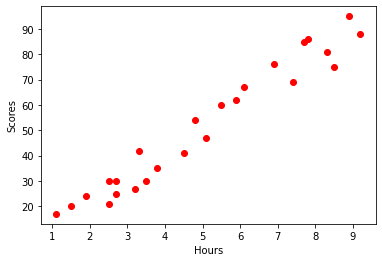

In [11]:
#Scatterplot
plt.plot(students.Hours,students.Scores,"ro");plt.xlabel("Hours");plt.ylabel("Scores") 

Above we can see the there is a strong positive correlation b/w two variables

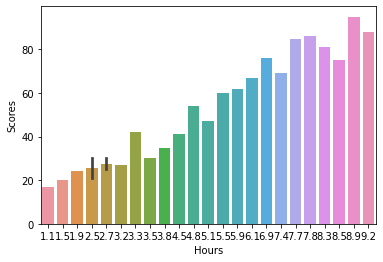

In [12]:
#Barplot
sns.barplot(x="Hours",y="Scores",data=students)

{'boxes': [<matplotlib.lines.Line2D at 0x7efe8eb63320>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe8ea5b4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efe8ea45cf8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efe8eaa82b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efe8eb63630>,
  <matplotlib.lines.Line2D at 0x7efe8e87a128>]}

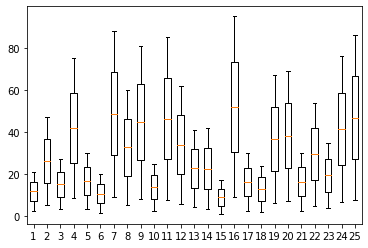

In [13]:
#Box plot
plt.boxplot(students)

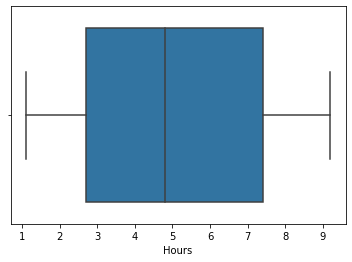

In [14]:
sns.boxplot(x=students["Hours"])#No outlayers


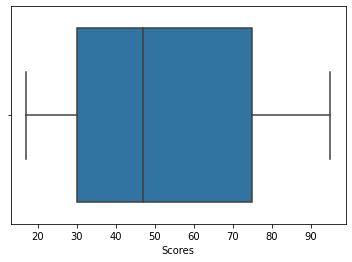

In [15]:
sns.boxplot(x=students["Scores"]) #No outlayers


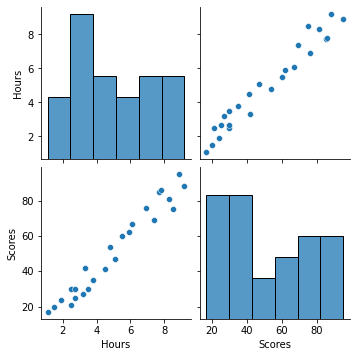

In [16]:
#pair plot. It's a combination of histogram and scatter plot.
sns.pairplot(students)

Finding the correlation b/w the variables


In [17]:
students.corr() #High correlation found

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Heat map to see the correlation through chart.


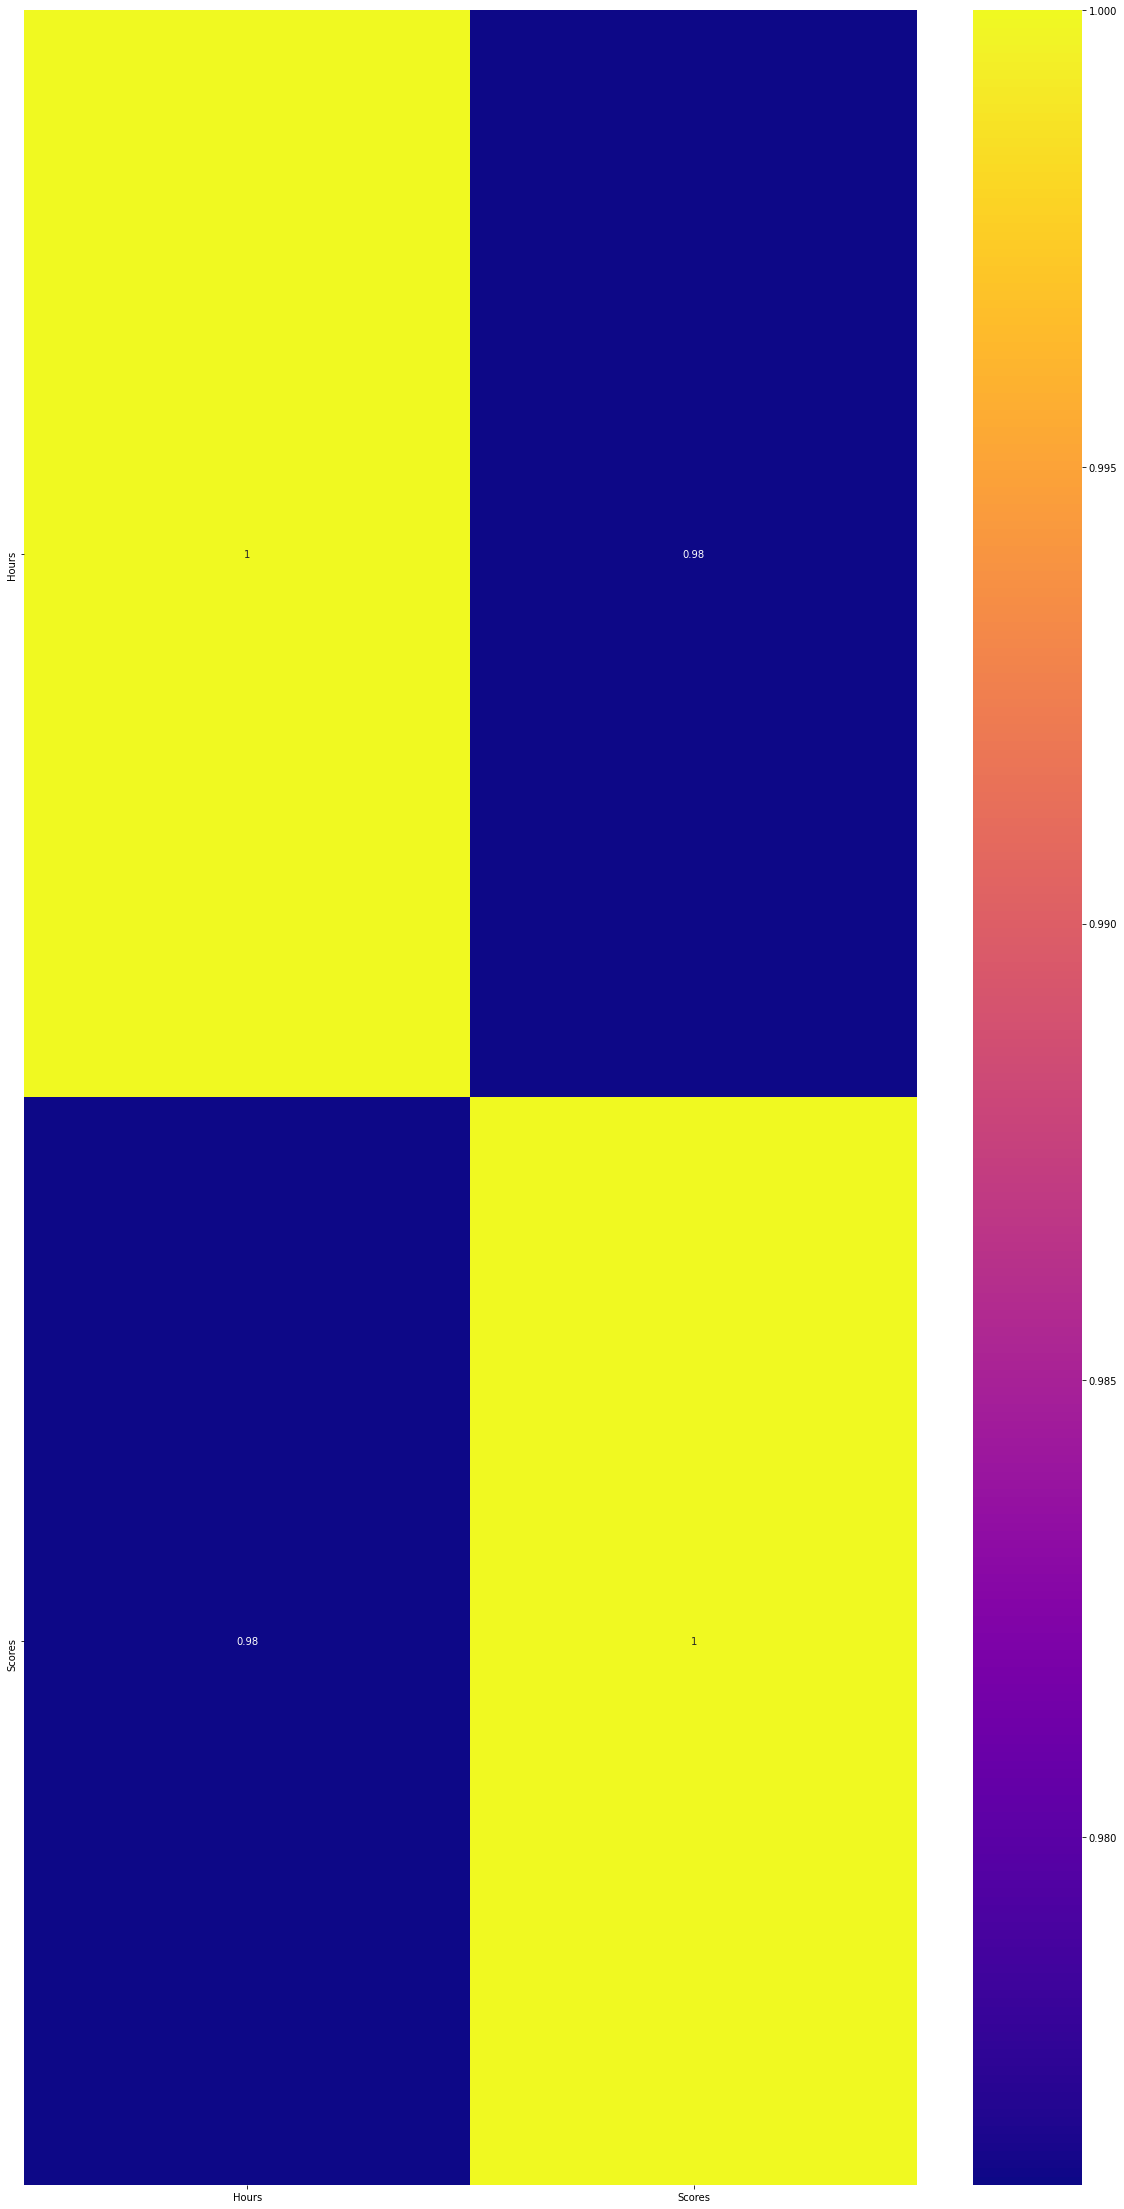

In [18]:
fig,ax = plt.subplots(figsize=(20,40))
sns.heatmap(students.corr(),cmap='plasma', annot=True)

Data Partition

separating the variables into target(o/p) v/s predictor(i/p).


In [19]:
predictor=students.iloc[:, :-1].values
target=students.iloc[:,1].values

spliting the varaibles into Xtrain,Ytrain,Xtest,Ytest, where train data is 80% and test data is 20%.


In [20]:
#For that importing a module called train_test_split from sklearn.
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(predictor,target,test_size=0.2,random_state=0)

Model Building

In [21]:
#Building the model using linear regression.
Regressor = LinearRegression()

Training the model


In [22]:
Model=Regressor.fit(Xtrain,Ytrain)

Checking the train score 

In [23]:
Model.score(Xtrain,Ytrain)


0.9515510725211553

Checking the test score

In [24]:
Model.score(Xtest,Ytest)


0.9454906892105354

Predicting the values

In [25]:
predicted = Model.predict(Xtest)

In [27]:
# Comparing Actual vs Predicted
Data = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted})  
Data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Model Evaluation

RMSE


In [28]:
Rmse = (np.sqrt(mean_squared_error(Ytest, predicted)))
print(Rmse)

4.647447612100373


MSE

In [29]:
metrics.mean_squared_error(Ytest,predicted)


21.598769307217456

Mean Absolute error(MAE)

In [30]:
metrics.mean_absolute_error(Ytest,predicted)


4.183859899002982

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

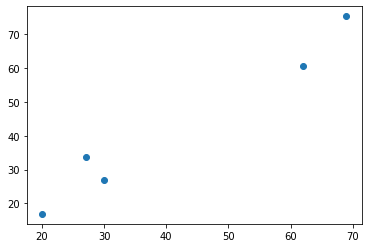

In [31]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,predicted)

predicting the score if a student studies for 9.25 hrs/ day?.


In [32]:
Hours=np.array(9.25).reshape(-1, 1)
Model.predict(Hours)

array([93.69173249])